# BLOSUM62 visualization

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load BLOSUM62

In [2]:
from Bio.SubsMat import MatrixInfo as matlist

blosum_matrix = matlist.blosum62

## Convert

In [3]:
import pandas as pd

scores = pd.Series(list(blosum_matrix.values()),
                  index=pd.MultiIndex.from_tuples(blosum_matrix.keys()))
scores

W  F    1
L  R   -2
S  P   -1
V  T    0
Q  Q    5
       ..
F  H   -1
B  F   -3
F  L    0
X  Q   -1
B  B    4
Length: 276, dtype: int64

In [4]:
reverse_scores = {}

for (aa0, aa1), score in scores.iteritems():
    if aa0 != aa1:
        reverse_scores[aa1, aa0] = score

reverse_scores = pd.Series(list(reverse_scores.values()),
                           index=pd.MultiIndex.from_tuples(reverse_scores.keys()))
reverse_scores

F  W    1
R  L   -2
P  S   -1
T  V    0
A  N   -2
       ..
R  Z    0
H  F   -1
F  B   -3
L  F    0
Q  X   -1
Length: 253, dtype: int64

In [5]:
scores_series = pd.concat([scores, reverse_scores])

df = scores_series.unstack()
df.shape

(23, 23)

In [6]:
df

,A,B,C,D,E,F,G,H,I,K,...,P,Q,R,S,T,V,W,X,Y,Z
A,4,-2,0,-2,-1,-2,0,-2,-1,-1,...,-1,-1,-1,1,0,0,-3,0,-2,-1
B,-2,4,-3,4,1,-3,-1,0,-3,0,...,-2,0,-1,0,-1,-3,-4,-1,-3,1
C,0,-3,9,-3,-4,-2,-3,-3,-1,-3,...,-3,-3,-3,-1,-1,-1,-2,-2,-2,-3
D,-2,4,-3,6,2,-3,-1,-1,-3,-1,...,-1,0,-2,0,-1,-3,-4,-1,-3,1
E,-1,1,-4,2,5,-3,-2,0,-3,1,...,-1,2,0,0,-1,-2,-3,-1,-2,4
F,-2,-3,-2,-3,-3,6,-3,-1,0,-3,...,-4,-3,-3,-2,-2,-1,1,-1,3,-3
G,0,-1,-3,-1,-2,-3,6,-2,-4,-2,...,-2,-2,-2,0,-2,-3,-2,-1,-3,-2
H,-2,0,-3,-1,0,-1,-2,8,-3,-1,...,-2,0,0,-1,-2,-3,-2,-1,2,0
I,-1,-3,-1,-3,-3,0,-4,-3,4,-3,...,-3,-3,-3,-2,-1,3,-3,-1,-1,-3
K,-1,0,-3,-1,1,-3,-2,-1,-3,5,...,-1,1,2,0,-1,-2,-3,-1,-2,1


## Visualize

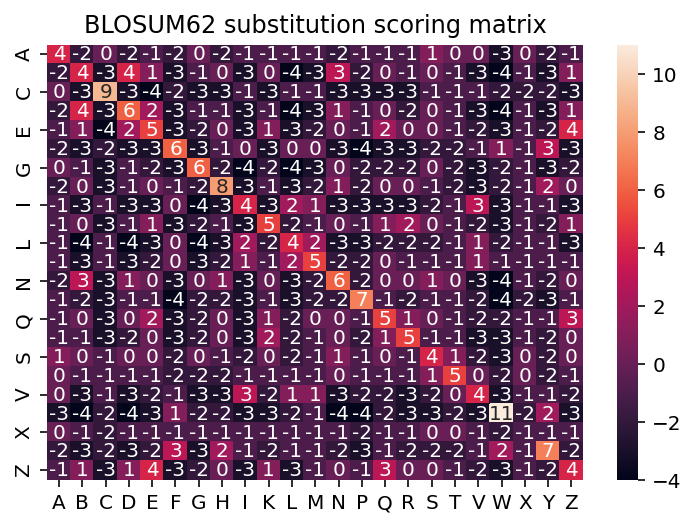

In [7]:
import seaborn as sns

ax = sns.heatmap(df, annot=True)
ax.set(title='BLOSUM62 substitution scoring matrix');